In [49]:
import adios2
import numpy as np
import io
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from mpi4py import MPI


In [51]:
bp_file = "build/all_groups.bp"

with adios2.Stream(bp_file, "r") as fh:
    for step in fh:
        vars = step.available_variables()
        group_names = sorted(set(var.split("/")[0] for var in vars.keys()))
        print("📦 Found groups:", group_names)


📦 Found groups: ['y0_q100']
📦 Found groups: ['y1_q100']
📦 Found groups: ['y2_q100']
📦 Found groups: ['y3_q100']
📦 Found groups: ['y4_q100']
📦 Found groups: ['y5_q100']
📦 Found groups: ['y6_q100']
📦 Found groups: ['y7_q100']
📦 Found groups: ['y8_q100']
📦 Found groups: ['y9_q100']


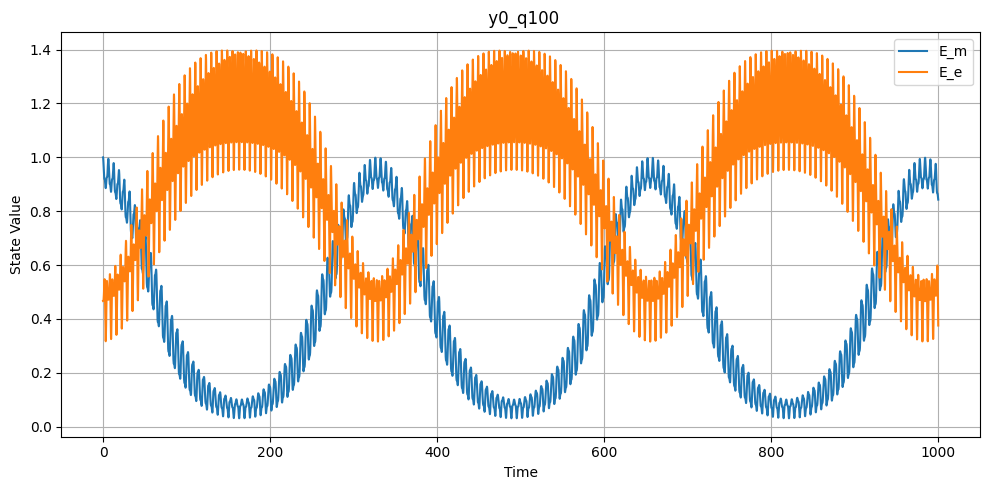

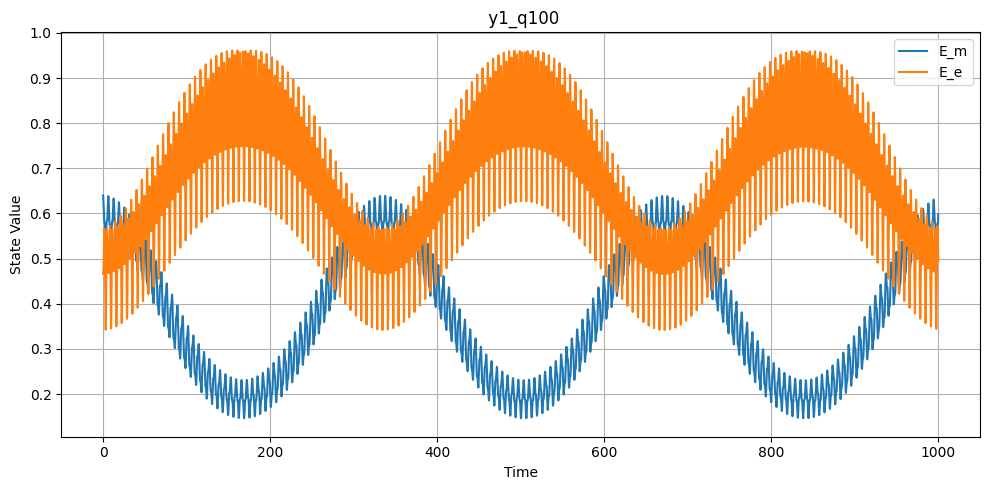

/tmp/ipykernel_125314/560519450.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/kairvilodhiya/MANE6965/Project-for-computing-at-scale/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


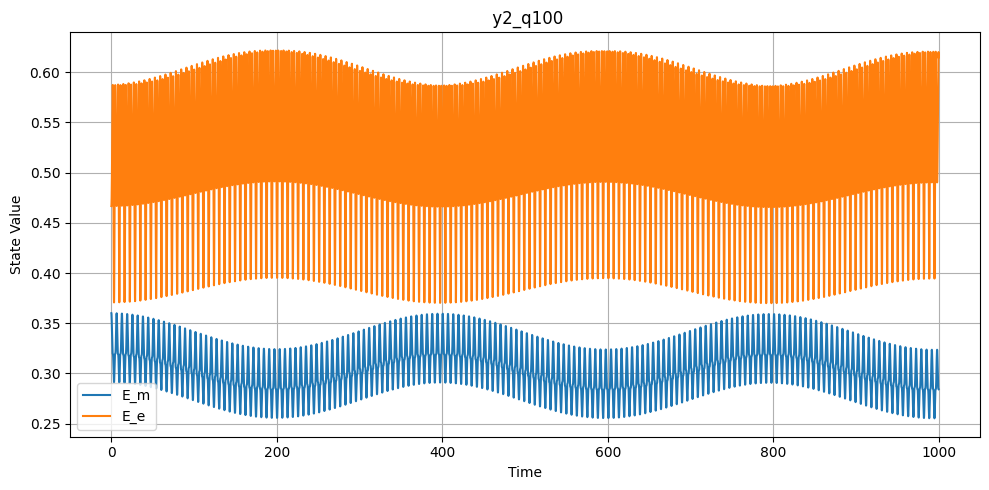

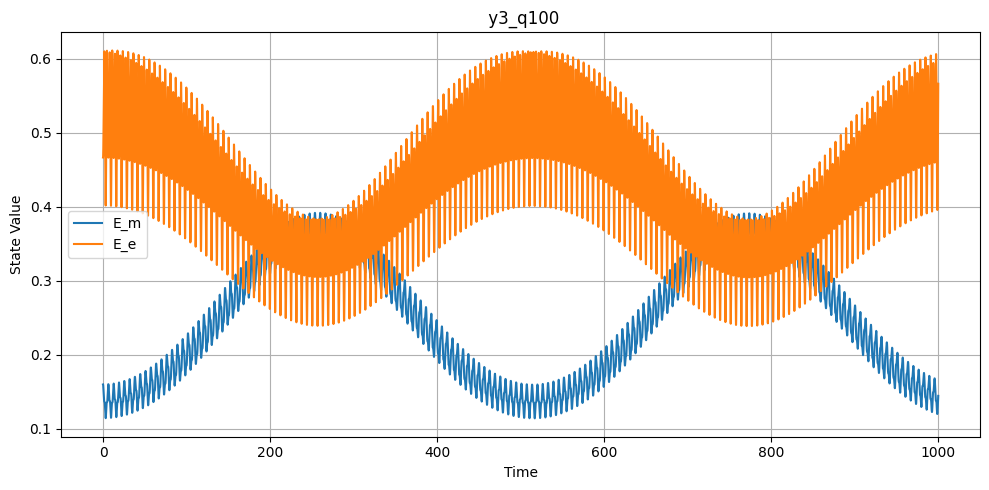

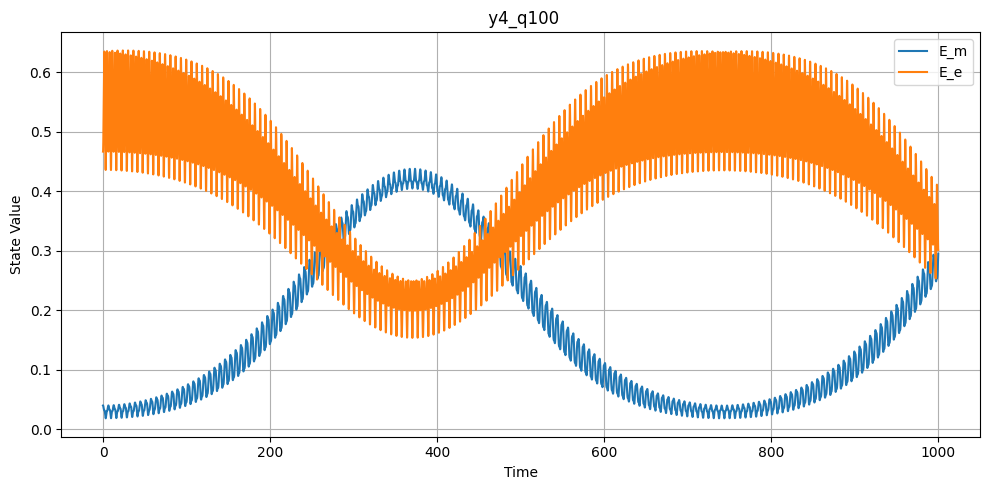

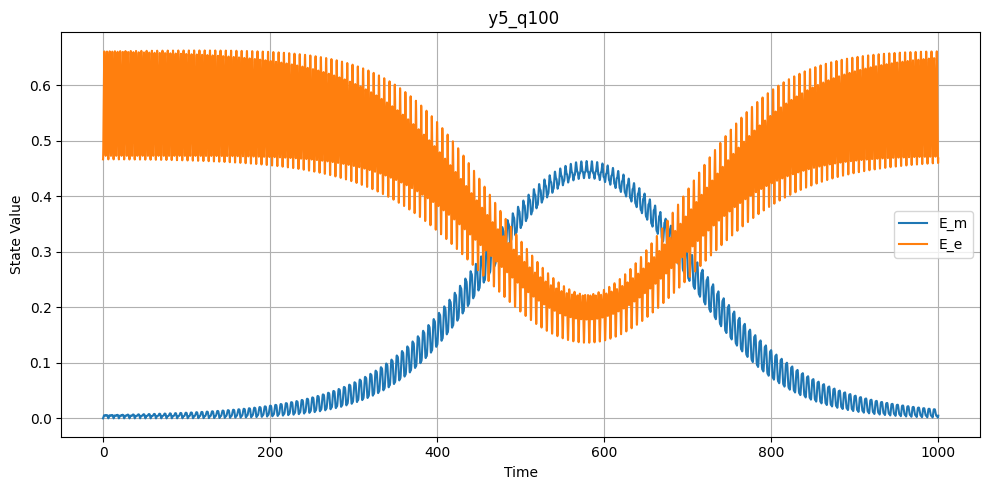

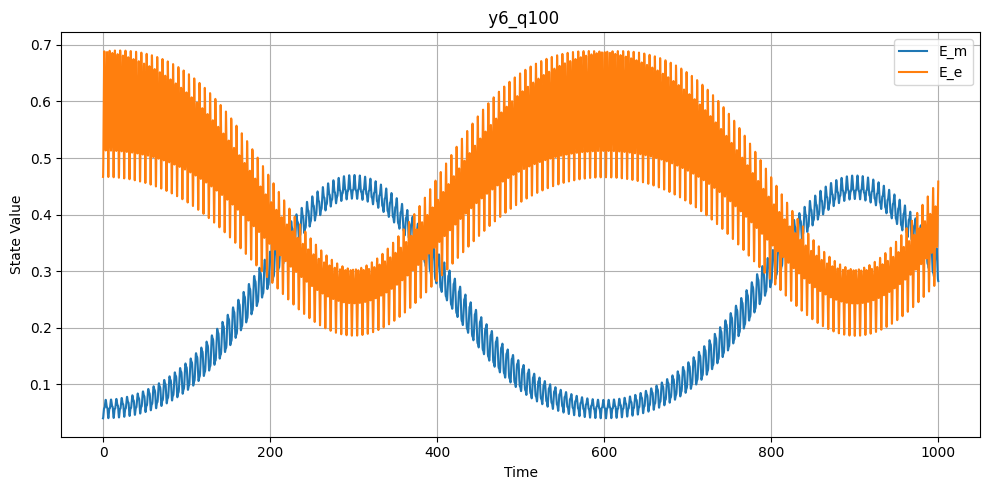

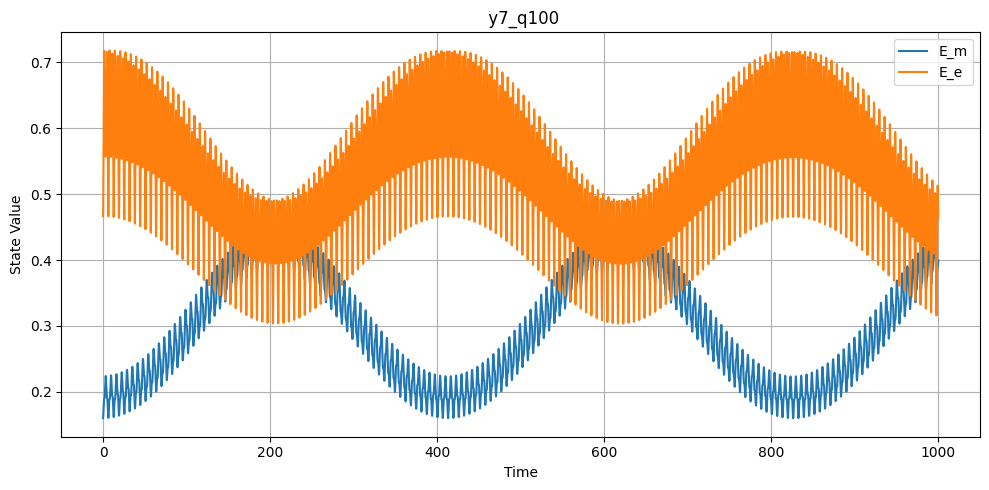

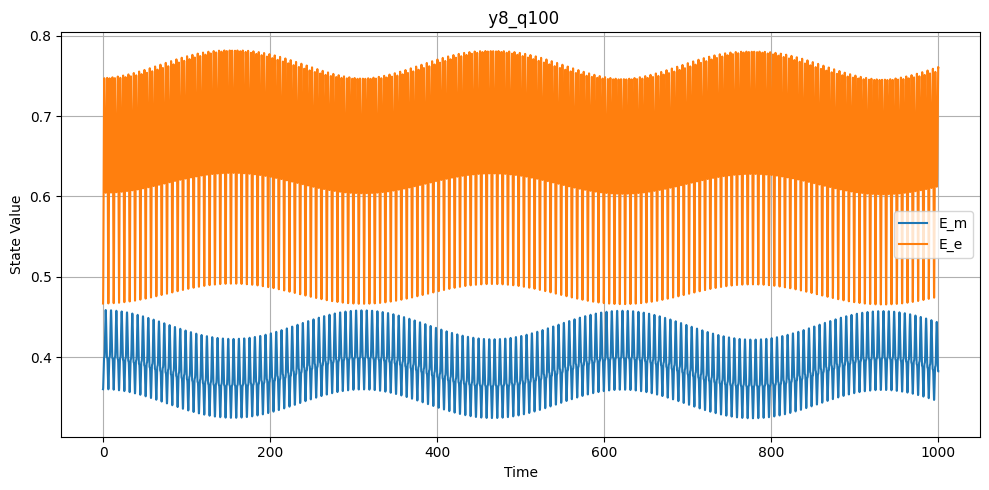

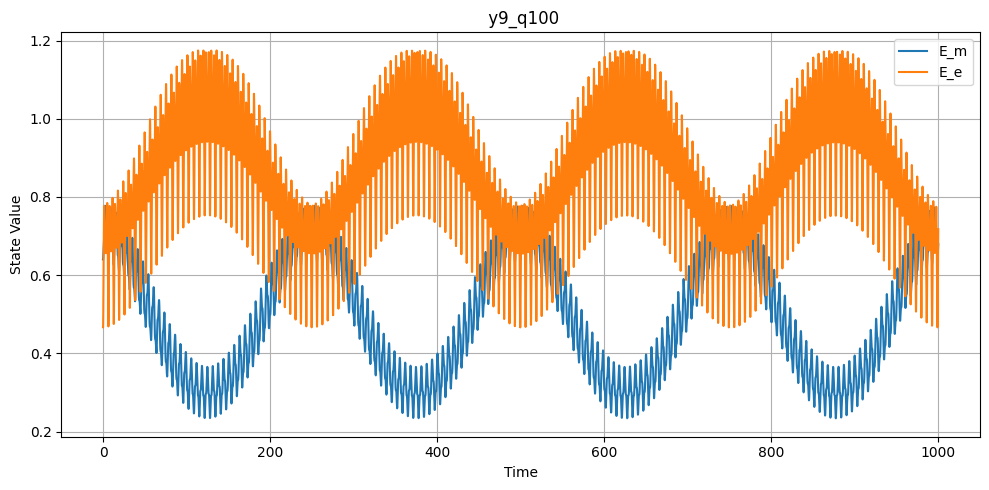

In [56]:
# Constants
C1 = 0.2
C2 = 0.7
C3 = 1 - C2
C4 = C1 * C2 / C3

with adios2.Stream(bp_file, "r") as fh:
    for step in fh:
        vars = step.available_variables()
        group_names = sorted(set(var.split("/")[0] for var in vars.keys()))
    
        for group in group_names:
            try:
                time = np.array(step.read(f"{group}/time"))
                y    = np.array(step.read(f"{group}/y"))
                q    = np.array(step.read(f"{group}/q"))
                dy    = np.array(step.read(f"{group}/dy"))
                dq    = np.array(step.read(f"{group}/dq"))

                E1 = (-2*dy)**2 + (1 - 2*y)**2
                E2 = C4*(1/C2*dq**2 + q**2 )

                plt.figure(figsize=(10, 5))
                plt.plot(time[1:1000000], E1[1:1000000], label="E_m", linewidth=1.5)
                plt.plot(time[1:1000000], E2[1:1000000], label="E_e", linewidth=1.5)
                plt.title(f" {group}")
                plt.xlabel("Time")
                plt.ylabel("State Value")
                plt.grid(True)
                plt.legend()
                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"[ERROR] Could not read group '{group}': {e}")
       